In [1]:
import numpy as np
from PIL import Image, ImageFilter


## Utilities

> For showing matrix of number as an image

$\text{show} :=  (\text{matrix} \in ndarray) \implies \text{filter} \in PIL.Image.Image$
----------------------------
> For generating `Difference of Gaussian` filter with shape of expected

$\text{DoG} := (\sigma_1 \in {\Bbb R}, \sigma_2 \in {\Bbb R}, \text{shape} \in tuple) \implies \text{filter} \in ndarray$
```python
filter = DoG(1,2,(3,3))
```
----------------------------
> For generatign `Difference of Gaussian` based on v1 criteria mecanism (mechanistic_v1_model).

> $\lambda$ := wavelength

> $\theta$ := orientation

> $\sigma$ := standard deviation

> $\gamma$ := aspect ratio

$\text{Gabor} = (\lambda \in {\Bbb R}, \theta \in {\Bbb R}, \sigma \in {\Bbb R}, \gamma \in {\Bbb R}) \implies \text{filter} \in ndarray$
```python
filter = Gabor(1, 3.5, 5, 3, (5,5))
```
----------------------------
> For generatign `Difference of Gaussian` based on v1 criteria mecanism

$\text{covolution_pass} = (\text{img} \in ndarray, \text{filter} \in ndarray) \implies \text{result} \in ndarray$
-----------------------------
> Zero padding and expand a filter to a bigger one
$\text{padding} = (\text{filter} \in ndarray, shape \in tuple) \implies \text{filter} \in ndarray$
```python
filter_9x9 = padding(filter_3x3, (9,9))
```
-----------------------------
> Get feature map for multiple images
$\text{convolution} = (\text{images} \in tuple_{ndarray}, \text{filters} \in tuple_{ndarray}, check \in Boolean) \implies feature_map \in array_{ndarray}$

```python
imgs = (img1, img2, img3, ...img_c)
# img1.shape = (wi, hi)

filters = (filter1, filter2, filter3 ... filter_n)
# filter1.shape = (wf, hf)

feature_map = convolution(imgs, filters)
# feature_map = [ndarray1(wi-wf+1, hi-hf+1, n)), ... ndarray_m(wi-wf+1, hi-hf+1, n)),]
```


In [6]:
def show(ndarray_mat):
    return Image.fromarray(ndarray_mat.astype(np.uint8))

In [169]:
def DoG(σ1, σ2, shape): 
    if (σ1 == 0 or σ2 == 0):
        print("WARNING: Result Filter gonna be all zero. σ1 and σ2 must be non zero")
        return np.zeros(shape)
        
    def _(x, y):
        xy_exp = (-x**2-y**2) / 2
        return (np.exp(xy_exp/σ1**2)/σ1 - np.exp(xy_exp/σ2**2)/σ2) / np.sqrt(2 * np.pi)
    return np.fromfunction(_, shape)

In [182]:
def Gabor(λ, θ, σ, γ, shape):
    if (λ == 0 or σ == 0):
        print("WARNING: Result Filter gonna be all zero. λ and σ must be non zero")
        return np.zeros(shape)
    def _(x, y):
        X = x*np.cos(θ) + y*np.sin(θ)
        Y = -x*np.sin(θ) + y*np.cos(θ)
        return np.exp(-(X**2 + γ**2*Y**2)/(2*σ**2)) * np.cos(2*np.pi*X/λ)
    return np.fromfunction(_, shape)

In [247]:
def covolution_pass(img, filter_mat):
    filter_size =  filter_mat.shape[0]
    res = np.zeros((img.shape[0]-filter_size+1, img.shape[1]-filter_size+1))

    for y in range(img.shape[0]-filter_size+1):
        for x in range( img.shape[1]-filter_size+1):
            img_view = img[y:y+filter_size, x:x+filter_size, ...]
            res[y,x] = np.sum(img_view * filter_mat)
    return res

In [12]:
def padding(filter_mat, shape):
    assert len(shape) == 2, 'Only 2D Filter are supportted'
    assert shape[0] == shape[1], 'Only Square Filter are supportted'
    assert shape[0] % 2 == 1, 'Only Even filter are accepted'
    assert filter_mat.shape[0] < shape[0], 'Only Exapnssions are supported'
    res = np.zeros(shape)
    res[(shape[0]-filter_mat.shape[0]) // 2:(shape[0]+filter_mat.shape[0]) // 2,
        (shape[1]-filter_mat.shape[1]) // 2:(shape[1]+filter_mat.shape[1]) // 2] = filter_mat
    return res

In [ ]:
def convolution(imgs, filters, check=True):
    if check:
        check_convolution([img.shape for img in imgs],
                          [kerner.shape for kerner in filters])
    
    (wi, hi, *shape) = imgs[0].shape
    (wf, hf, *shape) = filters[0].shape
    shape = (wi-wf+1,hi-hf+1, len(filters))
    
    feature_maps = [np.empty(shape) for i in range(len(imgs))]
    for img_index, img in enumerate(imgs):
        for kernel_index, kernel in enumerate(filters):
            feature_maps[img_index][...,kernel_index] = covolution_pass(img, kernel)
    return feature_maps
    
# TODO: Implement with check depth can return in sonner version
def check_convolution(imgs, filters):
    assert len(set(imgs)) == 1, 'All of images must have same shape, make sure thry are same image or feature_map'
    
    assert len(set(filters)) == 1, 'All of filers must have same shape'

    img, kernel = imgs[0], filters[0]

    assert len(img) > 1 and len(kernel) > 1, 'No 1D array or less are expected as filter or image'
    assert len(img) < 4 and len(kernel) < 4, 'No 4D array or more are expected as filter or image'

    assert kernel[0] == kernel[1], 'Kernel must be in square shape for axis=[0,1] (2k+1, 2k+1, d)'

    assert kernel[0] % 2 == 1, 'Kernel must be in odd shape for axis=[0,1] (2k+1, 2k+1, d)'

    assert len(img) == 2 == len(kernel) or img[-1] == kernel[-1], "filter kernel don't match with images"

- Read Image `Image.open(path_to_image)`
- Cover to graysacle Image `convert('L')`
- Resize image `resize((new_shape))`

In [2]:
im = Image.open('assets/sundarpichai.jpg').convert('L')
imn = np.array(im, 'f')
filter_shape = (11,11)

In [29]:
DoG_filter = DoG2D(-4,6.5,filter_shape)
imn_with_DoG = covolution_pass(imn, DoG_filter).astype(np.uint8)

In [183]:
MV1M_filter = Gabor(10, 4.5, 10, 0, filter_shape)
imn_with_MV1M = covolution_pass(imn, MV1M_filter).astype(np.uint8)

In [31]:
identity_filter = padding(np.ones((1,1)), filter_shape)
imn_identity = covolution_pass(imn, identity_filter).astype(np.uint8)

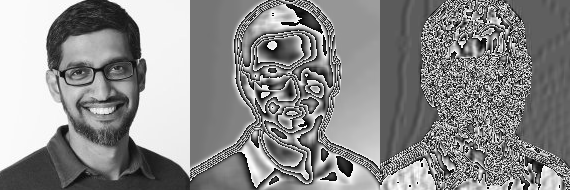

In [33]:
# inline preview
show(np.concatenate((imn_identity, imn_with_DoG, imn_with_MV1M), axis=1))

# temp file preview 
# show(np.concatenate((imn_identity, imn_with_DoG, imn_with_MV1M), axis=1)).show()

# save on disk
# show(np.concatenate((imn_identity, imn_with_DoG, imn_with_MV1M), axis=1)).save('DoG MV1.jpg', quality=95)

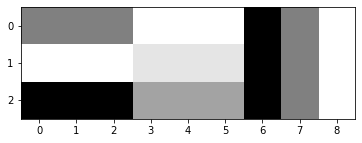

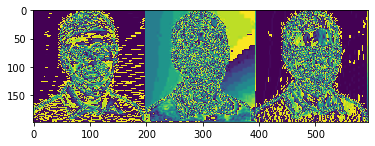

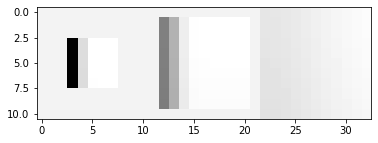

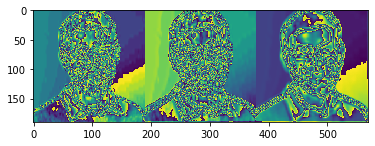

In [177]:
filters = (
    np.array([[0,0,0],[1,1,1], [-1,-1,-1]]),
    mechanistic_v1_model(10,0,-5,0, (3,3)),
    np.array([[-1,0,1],[-1,0,1], [-1,0,1]])
)
plt.figure(1)
plt.imshow(
        np.concatenate(filters, axis=1),
        cmap='binary_r', 
        interpolation='nearest'
    )
plt.figure(2)
plt.imshow(show(np.concatenate((covolution_pass(imn,filters[0]),
                     covolution_pass(imn,filters[1]),
                     covolution_pass(imn,filters[2])), 
                axis=1)))
filters = (
    padding(DoG2D(10,0.5,(5,5)), (11,11)),
    padding(DoG2D(10,1,(9,9)), (11,11)),
    DoG2D(10,3,(11,11)),
)
plt.figure(3)
plt.imshow(
        np.concatenate(filters, axis=1),
        cmap='binary_r', 
        interpolation='nearest'
    )
plt.figure(4)
plt.imshow(show(np.concatenate((covolution_pass(imn,filters[0]),
                     covolution_pass(imn,filters[1]),
                     covolution_pass(imn,filters[2])), 
                axis=1)))
plt.show()

# Interactive View 
> Please Install `ipywidgets` running these cells

In [51]:
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, widgets, interact_manual

In [176]:
@interact(
    σ1=widgets.FloatSlider(min=-10, max=10, step=0.5, value=1), 
    σ2=widgets.FloatSlider(min=-10, max=10, step=0.5, value=1.8),
    size=[3,5,7,9,11],
    padd=[0,2,4]
)
def plotter(σ1, σ2, size, padd):
    DoG_filter = DoG2D(σ1=σ1,σ2=σ2, shape=(size,size))
    if (padd != 0):
        DoG_filter = padding(DoG_filter, shape=(size+padd, size+padd))
    plt.imshow(
        DoG_filter, 
        cmap='binary_r', 
        interpolation='nearest'
    )
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='σ1', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

In [201]:
@interact(
    wave_length=widgets.FloatSlider(min=-100, max=100, step=0.5, value=8), 
    orientation=widgets.FloatSlider(min=-180, max=180, step=1, value=0),
    standard_deviation=widgets.FloatSlider(min=-10, max=10, step=0.5, value=6.5),
    aspect_ratio=widgets.FloatSlider(min=-10, max=10, step=0.5, value=0),
    size=[3,5,7,9,11],
    padd=[0,2,4]
)
def plotter(wave_length, orientation, standard_deviation, aspect_ratio, size, padd):
    mv1_filter = Gabor(λ=wave_length, 
                        θ=orientation, 
                        σ=standard_deviation, 
                        γ=aspect_ratio, 
                        shape=(size, size))
    if (padd != 0):
        mv1_filter = padding(mv1_filter, shape=(size+padd, size+padd))
    plt.imshow(
        mv1_filter,
        cmap='binary_r', 
        interpolation='nearest'
    )
    plt.show()

interactive(children=(FloatSlider(value=8.0, description='wave_length', min=-100.0, step=0.5), FloatSlider(val…

In [200]:
@interact_manual(
    wave_length=widgets.FloatSlider(min=0, max=100, step=0.5, value=4.5), 
    orientation=widgets.FloatSlider(min=-180, max=180, step=1, value=0),    
    standard_deviation=widgets.FloatSlider(min=-10, max=10, step=0.5, value=3.5),
    aspect_ratio=widgets.FloatSlider(min=-10, max=10, step=0.5, value=-4.5),
    size=[3,5,7,9,11, 33],
    padd=[0,2,4]    
)
def mv1_plotter(wave_length, orientation, standard_deviation, aspect_ratio, size, padd):
    mv1_filter = Gabor(λ=wave_length, 
                        θ=orientation, 
                        σ=standard_deviation, 
                        γ=aspect_ratio, 
                        shape=(size, size))
    if (padd != 0):
        mv1_filter = padding(mv1_filter, shape=(size+padd, size+padd))  
    display(show(covolution_pass(imn,mv1_filter).astype(np.uint8)))

interactive(children=(FloatSlider(value=4.5, description='wave_length', step=0.5), FloatSlider(value=0.0, desc…

# Tuner

In [181]:
filter_identity = np.zeros((3,3))
filter_identity[0,0] = 1
reduced_imn = covolution_pass(imn,filter_identity)

@interact_manual(
    wave_length=widgets.FloatSlider(min=0, max=10, step=0.5, value=1), 
    delta_1=widgets.FloatSlider(min=-1, max=1, step=0.5, value=1),
    orientation=widgets.FloatSlider(min=-10, max=10, step=0.5, value=4),
    delta_2=widgets.FloatSlider(min=-1, max=1, step=0.5, value=0),
    standard_deviation=widgets.FloatSlider(min=-10, max=10, step=0.5, value=10),
    delta_3=widgets.FloatSlider(min=-1, max=1, step=0.5, value=0),
    aspect_ratio=widgets.FloatSlider(min=-10, max=10, step=0.5, value=2.5),
    delta_4=widgets.FloatSlider(min=-1, max=1, step=0.5, value=0),
    size=[3,5,7,9,11]
)
def tunner_plotter(wave_length, delta_1, orientation, delta_2, standard_deviation, delta_3, aspect_ratio, delta_4, size,):
    a = covolution_pass(imn,Gabor(λ=wave_length, 
                                    θ=orientation, 
                                    σ=standard_deviation, 
                                    γ=aspect_ratio, 
                                    shape=(size, size)))

    b = covolution_pass(imn,Gabor(λ=wave_length + delta_1, 
                                    θ=orientation + delta_2, 
                                    σ=standard_deviation + delta_3, 
                                    γ=aspect_ratio + delta_4, 
                                    shape=(size, size)))

    display(show(np.concatenate((reduced_imn, a, b, b-a), axis=1)))

interactive(children=(FloatSlider(value=1.0, description='wave_length', max=10.0, step=0.5), FloatSlider(value…

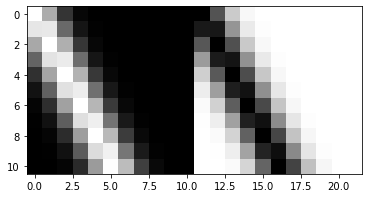

In [208]:
filters =  Gabor(λ=-100, θ=112, σ=1, γ=0, shape=(11, 11))
a = covolution_pass(imn,filters)
revert =  np.max(filters) - filters
b = covolution_pass(imn,revert)
plt.figure(1)
plt.imshow(
        np.concatenate((filters, revert), axis=1),
        cmap='binary_r', 
        interpolation='nearest'
    )
plt.show()

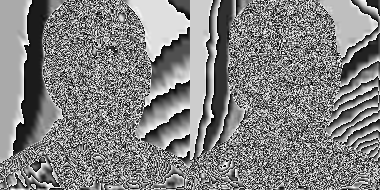

In [209]:
show(np.concatenate((a,b), axis=1))

In [278]:
import random
imn2 = np.array(Image.open('assets/sundarpichai.jpg').convert('L').resize((100,100)), 'f')

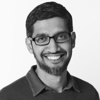

In [279]:
show(imn2)

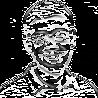

In [295]:
show(covolution_pass(imn2,  np.array([[0,0,0],[1,1,1], [-1,-1,-1]])))

-79 2.975065976165679 -3 -52


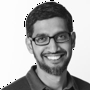

In [294]:
n = random.randint
m = random.random
λ=n(-1000,1000)+1
θ=m()*2*np.pi
σ=n(-100,100)+1
γ=n(-100,100)+1
print(λ, θ, σ, γ)
show(covolution_pass(imn2, Gabor(λ, θ, σ, γ, shape=(11, 11))))

In [281]:
# simple
# 130 5.646502886822061 52 81

# no gabor
# 538 5.5003317994546626 -1 -26

# complex
# 741 5.20216290551105 -96 3

In [424]:
%%time
r = (i for i in range(10**6))
l = list(set(r))


Wall time: 166 ms


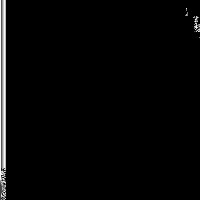

In [69]:
for i in reversed(range(1, len(imn[0]))):
    imn[:, i] -= imn[:, i - 1]

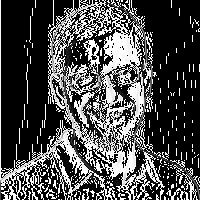

In [7]:
show(imn)

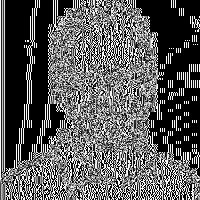